# NBA Game Outcome Projections

The goal of this project is to project the outcomes of NBA games. Having sucessfully wrangled the data, I will transform it into more meaningful variables using my domain knowledge, and then do some EDA to make sure the data is valid and normally distributed before moving on to modeling.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean.csv")

In [3]:
# make a 'game_id' column for index
df = df.rename(mapper={"Unnamed: 0":"game_id"},axis=1)
df = df.set_index(keys='game_id', drop=True)

In [4]:
# drop teams' first game of the season when they have no stats from which to predict
to_drop = df.loc[(df['away_win'] == 0) & (df['away_loss'] == 0)].index.values
to_drop2 = df.loc[(df['home_win'] == 0) & (df['home_loss'] == 0)].index.values
drop = np.concatenate((to_drop,to_drop2))
df = df.drop(index=drop)

In [5]:
# make individual stat columns more valuable/scaled
df_new = pd.DataFrame()
df_new['home_win'] = df.HOME_TEAM_WINS
df_new['h_fg2%'] = df.home_FG2M / df.home_FG2A
df_new['a_fg2%'] = df.away_FG2M / df.away_FG2A
df_new['h_fg3%'] = df.home_FG3M / df.home_FG3A
df_new['a_fg3%'] = df.away_FG3M / df.away_FG3A
df_new['h_2:3ratio'] = df.home_FG2A / df.home_FG3A
df_new['a_2:3ratio'] = df.away_FG2A / df.away_FG3A
df_new['h_fta/g'] = df.home_FTA / (df.home_win + df.home_loss)
df_new['a_fta/g'] = df.away_FTA / (df.away_win + df.away_loss)
df_new['h_ft%'] = df.home_FTM / df.home_FTA
df_new['a_ft%'] = df.away_FTM / df.away_FTA
df_new['h_ast/g'] = df.home_AST / (df.home_win + df.home_loss)
df_new['a_ast/g'] = df.away_AST / (df.away_win + df.away_loss)
df_new['h_to/g'] = df.home_TO / (df.home_win + df.home_loss)
df_new['a_to/g'] = df.away_TO / (df.away_win + df.away_loss)
df_new['h_oreb/g'] = df.home_OREB / (df.home_win + df.home_loss)
df_new['a_oreb/g'] = df.away_OREB / (df.away_win + df.away_loss)
df_new['h_dreb/g'] = df.home_DREB / (df.home_win + df.home_loss)
df_new['a_dreb/g'] = df.away_DREB / (df.away_win + df.away_loss)
df_new['h_blk/g'] = df.home_BLK / (df.home_win + df.home_loss)
df_new['a_blk/g'] = df.away_BLK / (df.away_win + df.away_loss)
df_new['h_stl/g'] = df.home_STL / (df.home_win + df.home_loss)
df_new['a_stl/g'] = df.away_STL / (df.away_win + df.away_loss)
df_new['h_pf/g'] = df.home_PF / (df.home_win + df.home_loss)
df_new['a_pf/g'] = df.away_PF / (df.away_win + df.away_loss)
df_new['h_bayeswin%'] = (1+df.home_win) / (2+ df.home_win + df.home_loss)
df_new['a_bayeswin%'] = (1+df.away_win) / (2+ df.away_win + df.away_loss)

In [6]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
home_win,22775.0,0.595653,0.490776,0.000000,0.000000,1.000000,1.000000,1.000000
h_fg2%,22775.0,0.483332,0.028426,0.279412,0.465187,0.481464,0.500578,0.637255
a_fg2%,22775.0,0.483600,0.028722,0.275362,0.465217,0.481701,0.500881,0.794118
h_fg3%,22775.0,0.350169,0.030682,0.000000,0.335668,0.351054,0.366576,0.700000
a_fg3%,22775.0,0.350446,0.029965,0.000000,0.335878,0.351145,0.366593,0.666667
h_2:3ratio,22775.0,3.300082,1.316921,0.578231,2.353731,3.108182,4.000000,30.400000
a_2:3ratio,22775.0,3.312838,1.425128,0.418182,2.353921,3.111888,4.000000,73.000000
h_fta/g,22775.0,25.183071,3.536491,13.000000,22.877047,25.000000,27.049082,64.000000
a_fta/g,22775.0,25.204535,3.567322,11.000000,22.880843,25.000000,27.076923,56.000000
h_ft%,22775.0,0.751976,0.034753,0.500000,0.732084,0.754074,0.775057,0.920000


In [7]:
# make a new df that takes the difference between each competing
# team's stats and extracts that as the potentially predictive
# variable
df_compare = pd.DataFrame()
df_compare['fg2%'] = df_new['h_fg2%'] - df_new['a_fg2%']
df_compare['fg3%'] = df_new['h_fg3%'] - df_new['a_fg3%']
df_compare['2:3ratio'] = df_new['h_2:3ratio'] - df_new['a_2:3ratio']
df_compare['fta/g'] = df_new['h_fta/g'] - df_new['a_fta/g']
df_compare['ft%'] = df_new['h_ft%'] - df_new['a_ft%']
df_compare['ast'] = df_new['h_ast/g'] - df_new['a_ast/g']
df_compare['to'] = df_new['h_to/g'] - df_new['a_to/g']
df_compare['oreb'] = df_new['h_oreb/g'] - df_new['a_oreb/g']
df_compare['dreb'] = df_new['h_dreb/g'] - df_new['a_dreb/g']
df_compare['blk'] = df_new['h_blk/g'] - df_new['a_blk/g']
df_compare['stl'] = df_new['h_stl/g'] - df_new['a_stl/g']
df_compare['pf'] = df_new['h_pf/g'] - df_new['a_pf/g']
df_compare['bayes_win%'] = df_new['h_bayeswin%'] - df_new['a_bayeswin%']
df_compare['home_win'] = df_new['home_win']

In [8]:
df_compare.describe().T

,count,mean,std,min,25%,50%,75%,max
fg2%,22775.0,-0.000268,0.033244,-0.335452,-0.020059,-0.000283,0.019798,0.248366
fg3%,22775.0,-0.000277,0.041804,-0.387924,-0.021492,0.000080,0.021567,0.448276
2:3ratio,22775.0,-0.012757,1.454626,-70.103448,-0.697179,-0.002677,0.679033,27.580851
fta/g,22775.0,-0.021464,4.104261,-27.000000,-2.461552,-0.036688,2.445146,31.000000
ft%,22775.0,0.000168,0.047854,-0.313682,-0.029420,0.000071,0.030266,0.304187
ast,22775.0,-0.018254,2.908716,-17.333333,-1.882170,-0.005921,1.835369,18.500000
to,22775.0,0.001472,1.930587,-17.000000,-1.139620,0.000000,1.152542,16.000000
oreb,22775.0,-0.021474,1.988802,-32.000000,-1.271766,-0.004892,1.233333,33.000000
dreb,22775.0,-0.033496,2.600415,-35.000000,-1.632323,-0.018372,1.569067,21.500000
blk,22775.0,-0.009404,1.355016,-10.000000,-0.836080,-0.003695,0.828158,11.000000


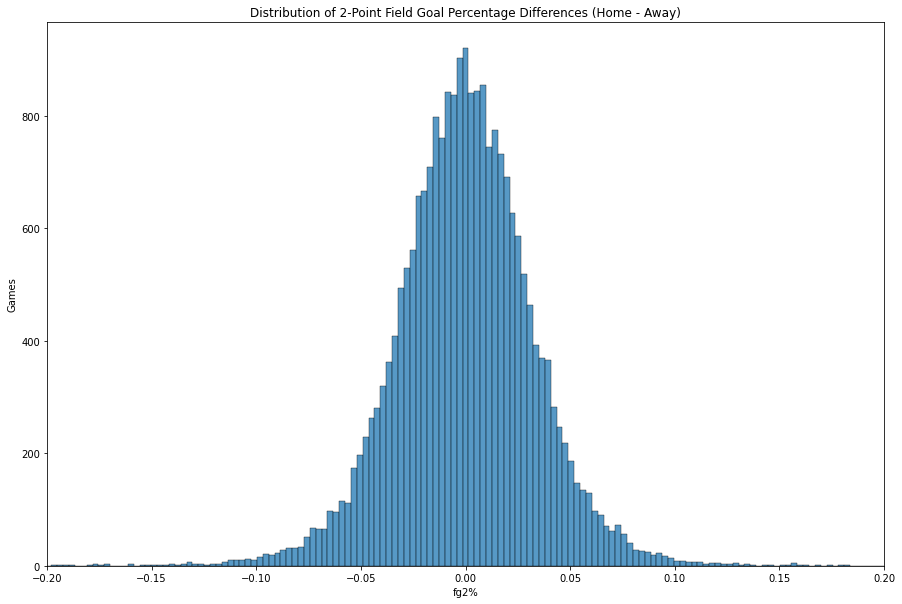

In [9]:
# before using this df for modeling, I want to check that the
# distributions of all of our variables are roughly
# normally distributed
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['fg2%'])
_ = plt.xlim(-0.2,0.2)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of 2-Point Field Goal Percentage Differences (Home - Away)')

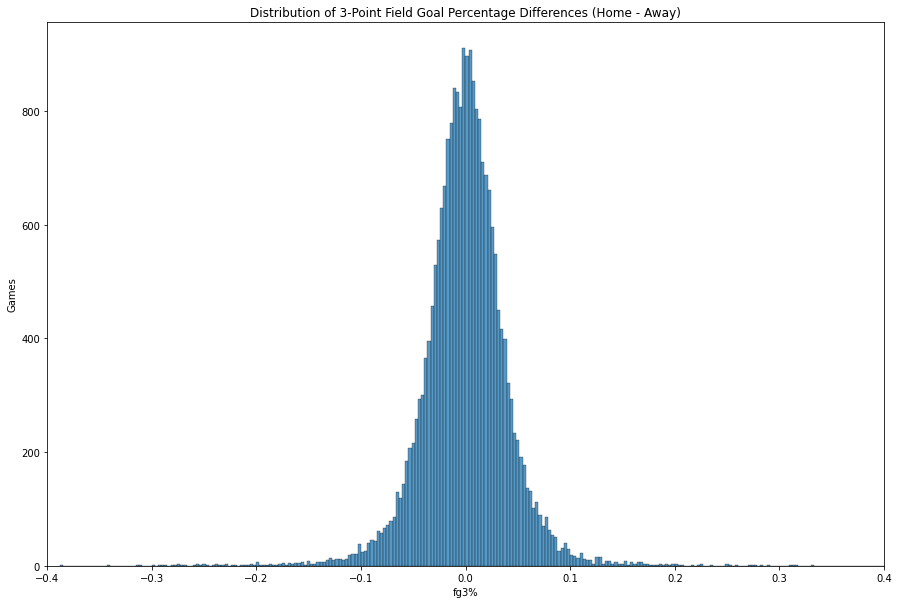

In [10]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['fg3%'])
_ = plt.xlim(-0.4,0.4)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of 3-Point Field Goal Percentage Differences (Home - Away)')

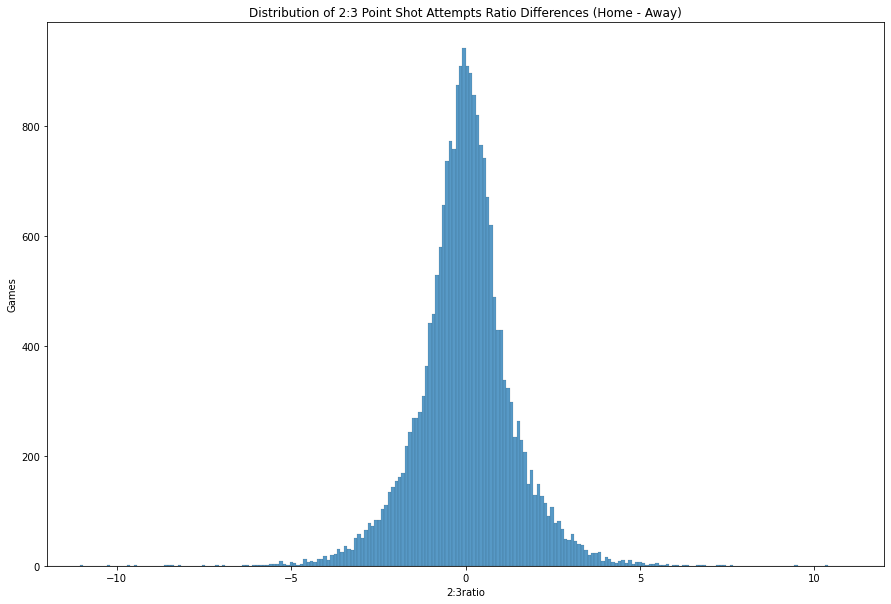

In [11]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['2:3ratio'])
_ = plt.xlim(-12,12)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of 2:3 Point Shot Attempts Ratio Differences (Home - Away)')

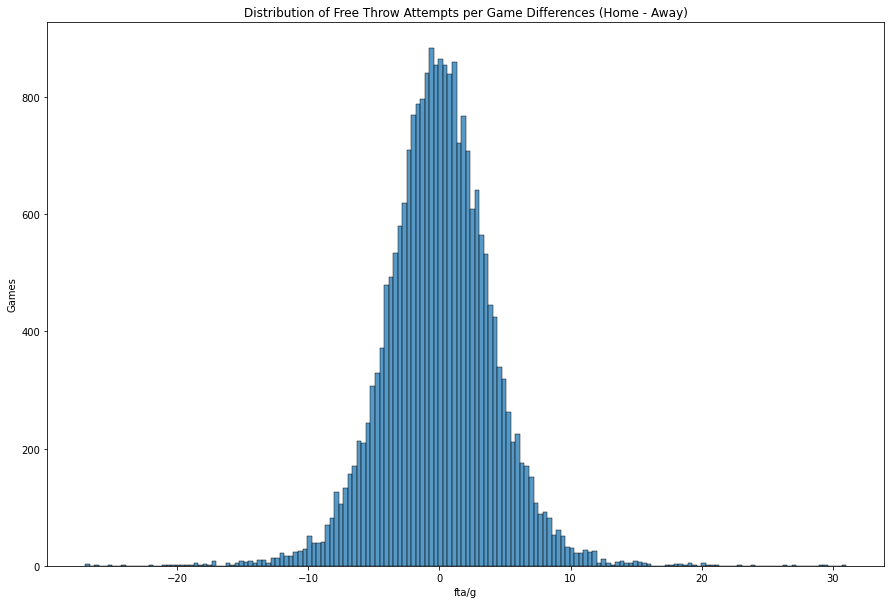

In [12]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['fta/g'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Free Throw Attempts per Game Differences (Home - Away)')

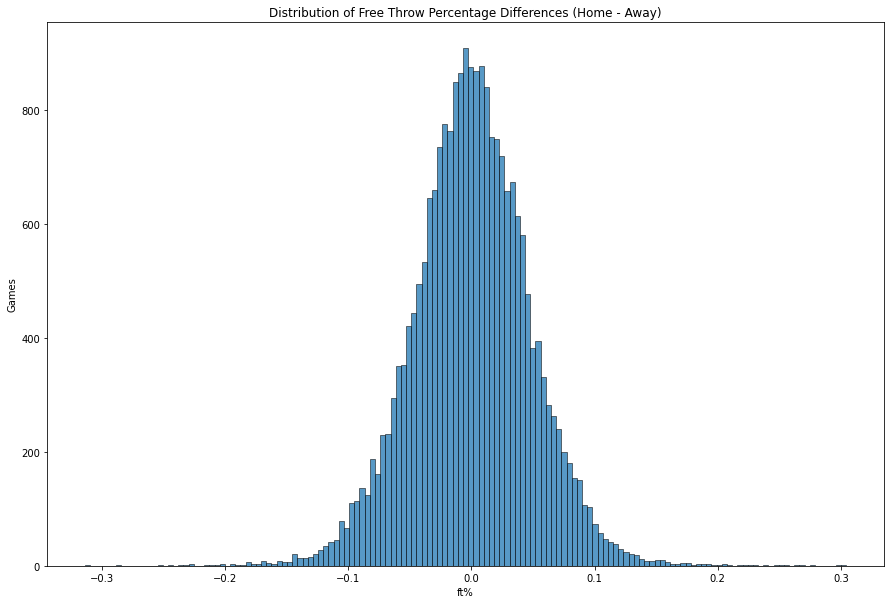

In [13]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['ft%'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Free Throw Percentage Differences (Home - Away)')

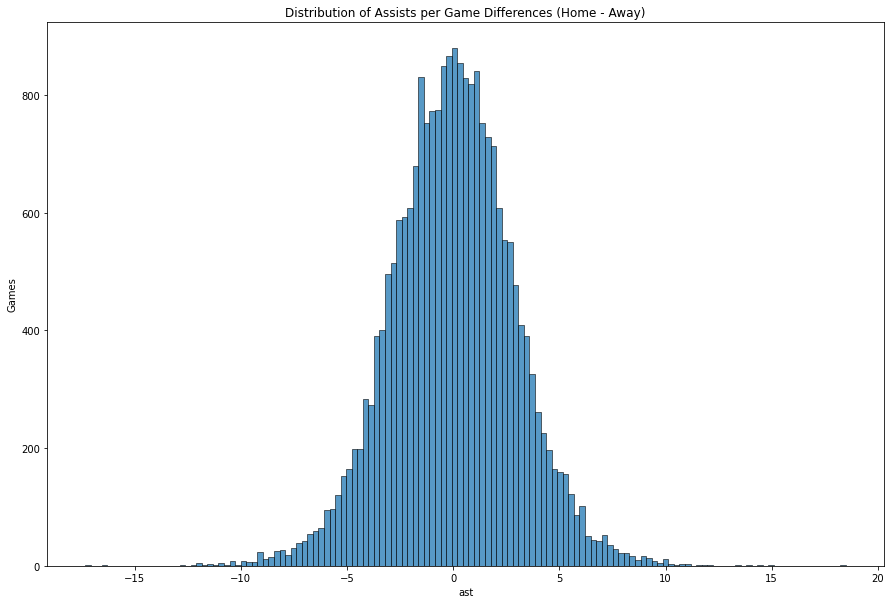

In [14]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['ast'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Assists per Game Differences (Home - Away)')

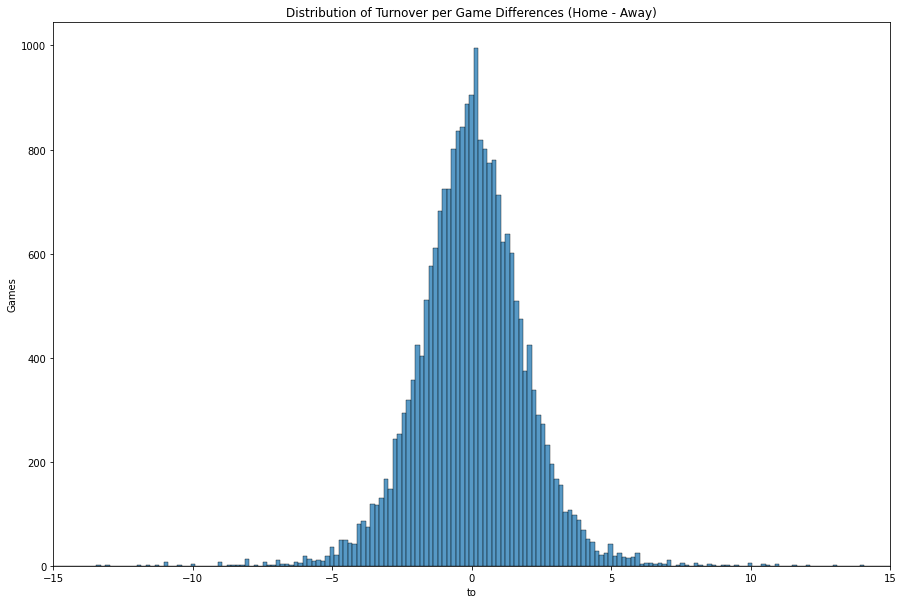

In [15]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['to'])
_ = plt.xlim(-15,15)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Turnover per Game Differences (Home - Away)')

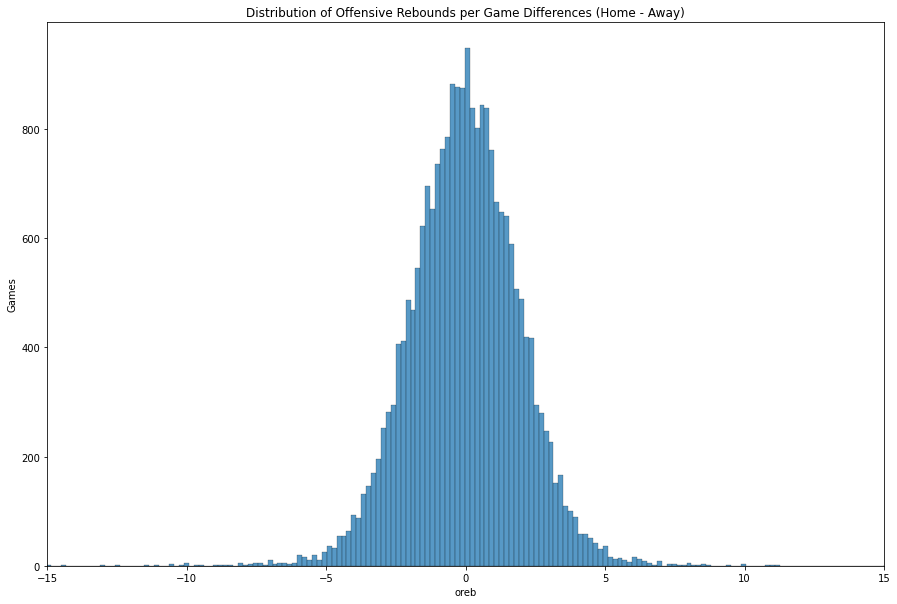

In [16]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['oreb'])
_ = plt.xlim(-15,15)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Offensive Rebounds per Game Differences (Home - Away)')

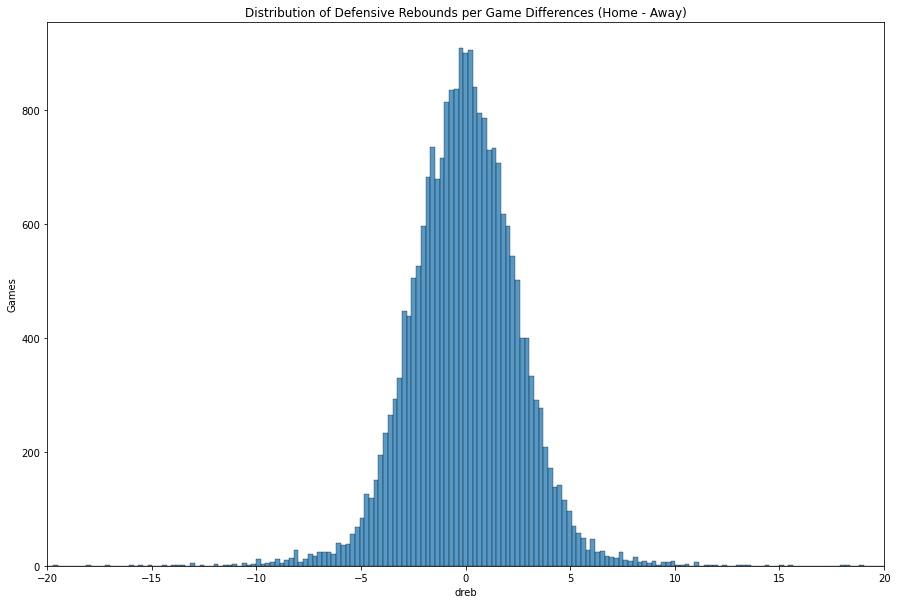

In [17]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['dreb'])
_ = plt.xlim(-20,20)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Defensive Rebounds per Game Differences (Home - Away)')

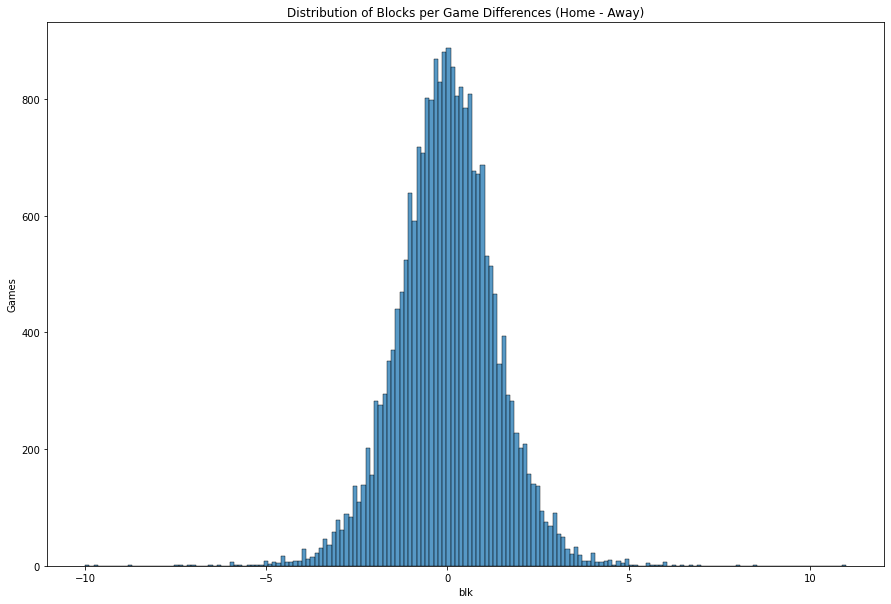

In [18]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['blk'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Blocks per Game Differences (Home - Away)')

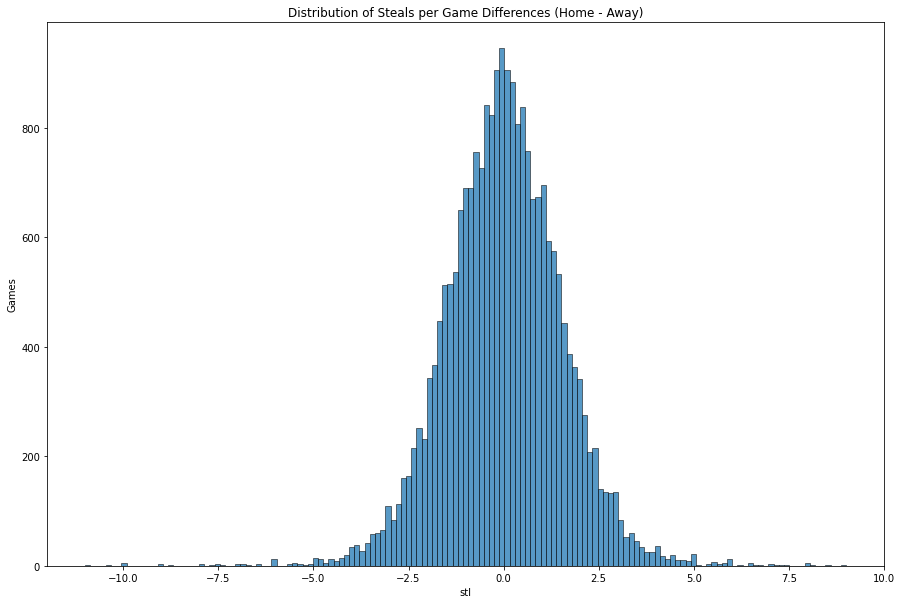

In [19]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['stl'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Steals per Game Differences (Home - Away)')

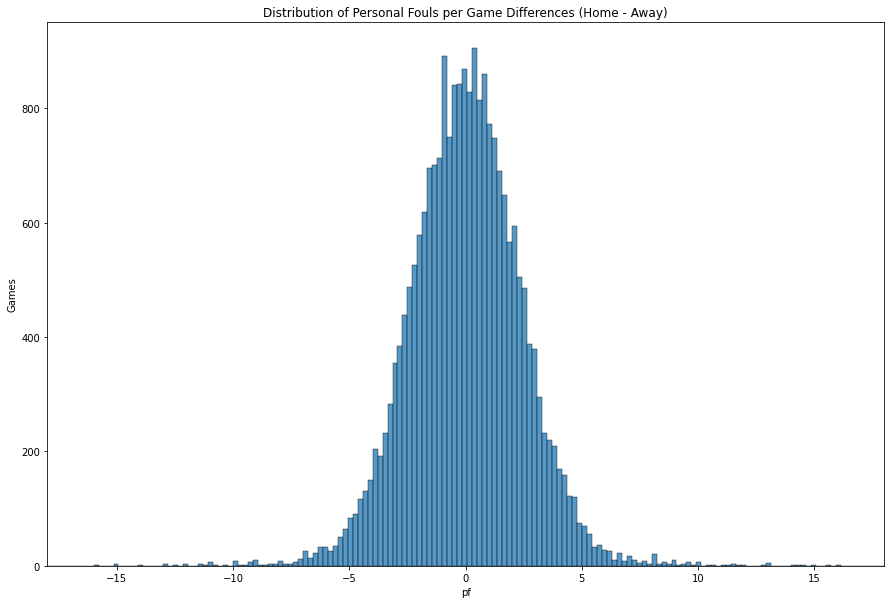

In [20]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['pf'])
_ = plt.xlim(-18,18)
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Personal Fouls per Game Differences (Home - Away)')

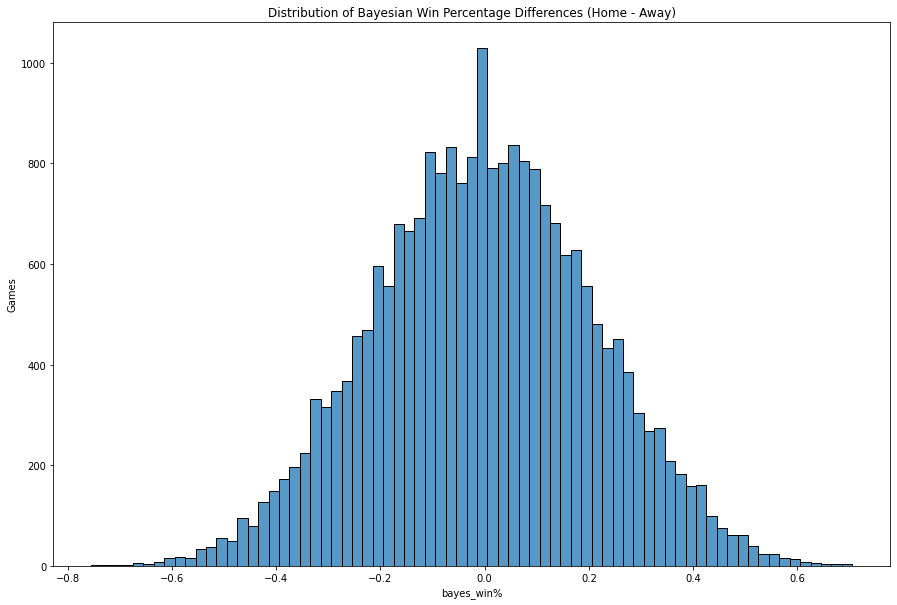

In [21]:
_ = plt.figure(figsize=(15,10))
_ = sns.histplot(df_compare['bayes_win%'])
_ = plt.ylabel('Games')
_ = plt.title('Distribution of Bayesian Win Percentage Differences (Home - Away)')

All of our variables distributions look very close to normally distributed. There are a few outliers, which likely represent very early season games when both teams have accumulated less stats, leading to more highly variable differences between the two teams. I will not take these out of the dataset, since they are valid datapoints that are rare enough that I don't think they will have an outsized effect on the dataset.

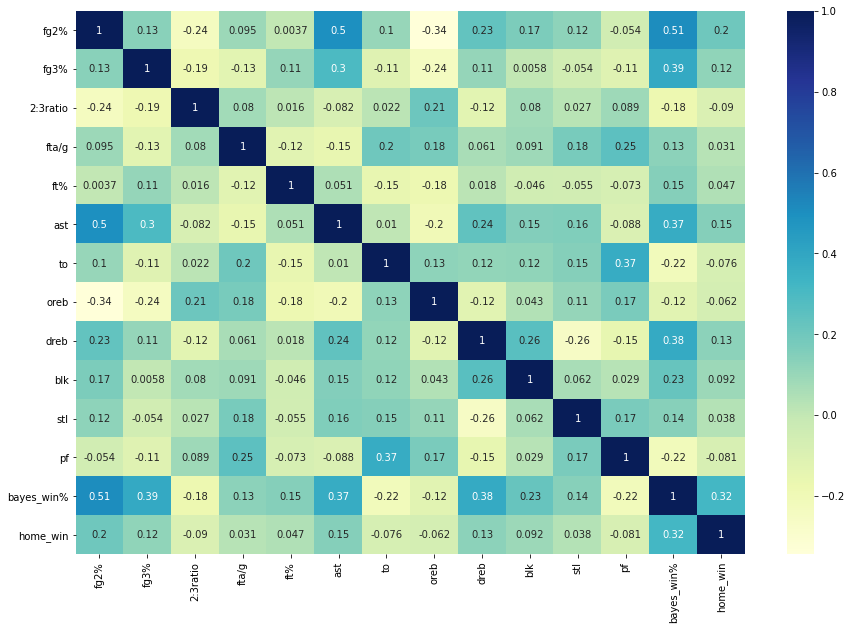

In [22]:
# heatmap, to check data relationships
_ = plt.figure(figsize=(15,10))
_ = sns.heatmap(df_compare.corr(),cmap="YlGnBu",annot=True)

Since these are the differences between the home and away team's stats entering each individual game, the row/column we are interested in is the bottom/left-most one, checking for correlation with our binary classification response variable, home_win.

So, the following stats are most predictive, when a home team enters a game with any of the following statistics greater than their opponents
(in order of importance)
1. Winning %
2. 2-point FG%
3. Assists per Game
4. Defensive Rebounds per Game
5. 3-point FG%
6. Blocks per Game

I will also do some PCA, or Lasso to verify those results and disentangle any multicolinearity in future project steps. These results are super interesting to me though! The winning percentage being predictive is expected, but I would not have expected assists to be so predictive.

In [23]:
# export to csv
df_compare.to_csv("compare.csv")